<a href="https://colab.research.google.com/github/bmoazen/Gwynn_vs_Hornsby/blob/main/Gwynn_vs_Hornsby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


# Read the csvs from GitHub

In [6]:
#from google.colab import files
#uploaded = files.upload()

# Read in 1987 MLB stats from Github
url = 'https://raw.githubusercontent.com/bmoazen/Gwynn_vs_Hornsby/main/stats/1987MLBBatting.csv'
mlb1987df = pd.read_csv(url)

# Read in 1987 MLB stats from Github
url = 'https://raw.githubusercontent.com/bmoazen/Gwynn_vs_Hornsby/main/stats/1924MLBBatting.csv'
mlb1924df = pd.read_csv(url)




In [34]:
mlb1987df.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Tony Gwynn*\gwynnto01,27.0,SDP,NL,157.0,680.0,589.0,119.0,218.0,...,0.511,0.958,158.0,301.0,13.0,3.0,2.0,4.0,26.0,*9/H
1,2,Wade Boggs*\boggswa01,29.0,BOS,AL,147.0,667.0,551.0,108.0,200.0,...,0.588,1.049,174.0,324.0,13.0,2.0,1.0,8.0,19.0,*5/3DH
2,3,Paul Molitor\molitpa01,30.0,MIL,AL,118.0,542.0,465.0,114.0,164.0,...,0.566,1.003,161.0,263.0,4.0,2.0,5.0,1.0,2.0,D54/H
3,4,Alan Trammell\trammal01,29.0,DET,AL,151.0,668.0,597.0,109.0,205.0,...,0.551,0.953,155.0,329.0,11.0,3.0,2.0,6.0,8.0,*6/H
4,5,Pedro Guerrero\guerrpe01,31.0,LAD,NL,152.0,630.0,545.0,89.0,184.0,...,0.539,0.955,154.0,294.0,16.0,4.0,0.0,7.0,18.0,*73/H


In [35]:
mlb1924df.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Rogers Hornsby\hornsro01,28.0,STL,NL,143,642,536,121,227,...,0.696,1.203,222.0,373,NaN,2,13,NaN,NaN,*4
1,2,Babe Ruth*\ruthba01,29.0,NYY,AL,153,681,529,143,200,...,0.739,1.252,220.0,391,NaN,4,6,NaN,NaN,*97/8H
2,3,Zack Wheat*\wheatza01,36.0,BRO,NL,141,624,566,92,212,...,0.549,0.978,163.0,311,NaN,4,5,NaN,NaN,*7/H
3,4,Charlie Jamieson*\jamiech01,31.0,CLE,AL,143,663,594,98,213,...,0.458,0.865,121.0,272,NaN,2,17,NaN,NaN,*7/H
4,5,Ross Youngs*\youngro01,27.0,NYG,NL,133,612,526,112,187,...,0.521,0.962,159.0,274,NaN,3,6,NaN,NaN,*9/4H


# Filter data

In [38]:
# Filter each dataframe for National League (same ptichers) as well as for plate appearances
pa=502

mlb1987filter=mlb1987df[(mlb1987df.Lg=='NL') & (mlb1987df.PA > pa)]
mlb1924filter=mlb1924df[(mlb1924df.Lg=='NL') & (mlb1924df.PA > pa)]

In [39]:
mlb1987filter.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Tony Gwynn*\gwynnto01,27.0,SDP,NL,157.0,680.0,589.0,119.0,218.0,...,0.511,0.958,158.0,301.0,13.0,3.0,2.0,4.0,26.0,*9/H
4,5,Pedro Guerrero\guerrpe01,31.0,LAD,NL,152.0,630.0,545.0,89.0,184.0,...,0.539,0.955,154.0,294.0,16.0,4.0,0.0,7.0,18.0,*73/H
6,7,Tim Raines#\raineti01,27.0,MON,NL,139.0,627.0,530.0,123.0,175.0,...,0.526,0.955,149.0,279.0,9.0,4.0,0.0,3.0,26.0,*7
12,13,John Kruk*\krukjo01,26.0,SDP,NL,138.0,527.0,447.0,72.0,140.0,...,0.488,0.894,140.0,218.0,6.0,0.0,3.0,4.0,15.0,37H
13,14,Dion James*\jamesdi01,24.0,ATL,NL,134.0,574.0,494.0,80.0,154.0,...,0.472,0.869,126.0,233.0,8.0,2.0,5.0,3.0,2.0,*87H


In [40]:
mlb1924filter.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Rogers Hornsby\hornsro01,28.0,STL,NL,143,642,536,121,227,...,0.696,1.203,222.0,373,NaN,2,13,NaN,NaN,*4
2,3,Zack Wheat*\wheatza01,36.0,BRO,NL,141,624,566,92,212,...,0.549,0.978,163.0,311,NaN,4,5,NaN,NaN,*7/H
4,5,Ross Youngs*\youngro01,27.0,NYG,NL,133,612,526,112,187,...,0.521,0.962,159.0,274,NaN,3,6,NaN,NaN,*9/4H
5,6,Kiki Cuyler\cuyleki01,25.0,PIT,NL,117,515,466,94,165,...,0.539,0.940,148.0,251,NaN,7,12,NaN,NaN,*79/8H
8,9,Edd Roush*\roushed01,31.0,CIN,NL,121,519,483,67,168,...,0.501,0.877,134.0,242,NaN,0,14,NaN,NaN,*8/H


In [47]:
mlb1987filter.columns

Index(['Rk', 'Name', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA▼', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Pos Summary'],
      dtype='object')

# Plots

(array([ 0.,  2.,  4., 14., 23.,  8.,  2.,  0.,  1.,  0.,  0.,  0.]),
 array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 ,
        0.42, 0.44]),
 <a list of 12 Patch objects>)

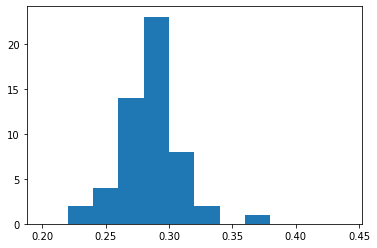

In [60]:
import matplotlib.pyplot as plt

bins=[0.2,0.22,0.24,0.26,0.28,0.30,0.32,0.34,0.36,0.38,0.4,0.42,0.44]
BA1987=mlb1987filter['BA▼']
plt.hist(BA1987, bins=bins,range=[0.2,0.46])


(array([ 0.,  0.,  5.,  4., 10.,  7.,  5.,  3.,  1.,  0.,  0.,  1.]),
 array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 ,
        0.42, 0.44]),
 <a list of 12 Patch objects>)

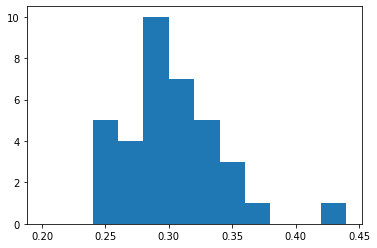

In [61]:
BA1924=mlb1924filter['BA▼']
plt.hist(BA1924, bins=bins, range=[0.2,0.46])

0.28353703703703703

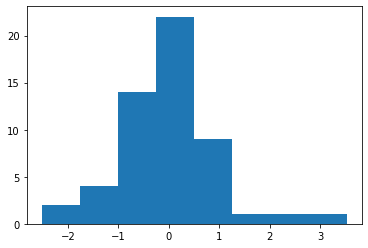

In [75]:
import statistics 

mean1987=statistics.mean(BA1987)
stdev1987=statistics.stdev(BA1987)
z1987=(BA1987-mean1987) / stdev1987
plt.hist(z1987, bins=8)
mean1987

0.30269444444444443

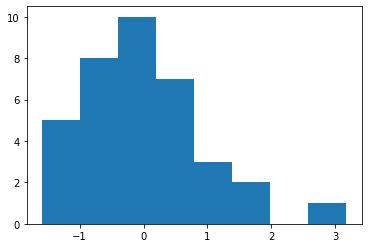

In [76]:
mean1924=statistics.mean(BA1924)
stdev1924=statistics.stdev(BA1924)
z1924=(BA1924-mean1924) / stdev1924
plt.hist(z1924, bins=8)
mean1924